In [94]:
import json
from graphviz import Digraph

In [66]:
operators = {
    "+",
    "*",
    "(",
    ")",
    "|",
    ".",
    "[",
    "]",
    "&",
}

# a-z A-z 0-9
alpha_numerics = set(
    [chr(i) for i in range(48, 58)]
    + [chr(i) for i in range(65, 91)]
    + [chr(i) for i in range(97, 123)]
)
operators_precedence = {
    "*": 6,
    "+": 5,
    "?": 4,
    "&": 3,
    ".": 2,
    "|": 1,
}

In [157]:
def check_inner_range(range_regex):
    valid_ranges = [range(48, 58), range(65, 91), range(97, 123)]
    index = 1

    while index < len(range_regex) - 1:
        current_char = range_regex[index]

        if current_char in alpha_numerics:
            index += 1
        elif current_char in operators_precedence.keys():
            return False
        elif current_char == "-":
            prev_char = range_regex[index - 1]
            next_char = range_regex[index + 1]
            if not (
                prev_char in alpha_numerics
                and next_char in alpha_numerics
                and ord(prev_char) < ord(next_char)
                and any(
                    [
                        set(range(ord(prev_char), ord(next_char))).issubset(ranges)
                        for ranges in valid_ranges
                    ]
                )
            ):
                return False
            index += 2
        else:
            return False
    return True


def validate_brackets(in_regex):
    stack = []
    for c in in_regex:
        if c == "(" or c == "[":
            stack.append(c)
        elif c == ")":
            if not stack or stack[-1] != "(":
                return False
            stack.pop()
        elif c == "]":
            if not stack or stack[-1] != "[":
                return False
            stack.pop()
    if stack:
        return False
    return True


def validate_ranges(in_regex):
    stack = []
    pairs = {}
    brackets = {'[': ']'}  # Map opening to closing brackets

    for index, char in enumerate(in_regex):
        if char in brackets:  # It's an opening bracket
            stack.append((char, index))  # Push tuple of (char, index)
        elif char in brackets.values():  # It's a closing bracket
            last_open, last_index = stack.pop()
            if brackets[last_open] == char:  # Check if brackets match
                pairs[last_index] = index
            else:
                continue  # Mismatched bracket, ignore or handle error

    # check that pairs are at least more than 1 index apart
    for start, end in pairs.items():
        if end - start < 2:
            return False
        if not check_inner_range(in_regex[start:end+1]):
            return False
        # check valid range

    return True


def validate_operators(in_regex):
    invalid_ops = {"+", "-", "*"}
    for index, current_char in enumerate(in_regex):
        if current_char in invalid_ops:  # lw ana + lazem yeb2a ably alpha_numeric aw closing bracket
            if index - 1 >= 0:
                prev_char = in_regex[index - 1]
                if not (prev_char in alpha_numerics or prev_char == ")" or prev_char == "]"):
                    print("Invalid operator")
                    return False
            else:   # means it's starting with +
                print("Invalid operator start")
                return False

            if index + 1 < len(in_regex):
                next_char = in_regex[index + 1]
                if next_char in invalid_ops:  # ++ aw +* aw +)
                    print("Invalid operator next to operator")
                    return False

    return True


def is_valid_regex(in_regex):

    if not validate_brackets(in_regex):
        print("Invalid brackets")
        return False

    if not validate_ranges(in_regex):
        print("Invalid ranges")
        return False

    if not validate_operators(in_regex):
        print("Invalid operators")
        return False
    return True


is_valid_regex("(a|bb)*")

True

In [128]:
# precedence from highest to lowest
# Closure (Kleene star) a*
# Concatenation ab
# Union a+b
# If the input symbol is a letter… append it directly to the output queue
# If the input symbol is an operator… if there exists an operator already on the top of the operator stack with higher

# or equal precedence than our current input symbol, remove the operator from the top of the operator stack and append it

# to the output queue.

# Do this until the current input symbol has a higher precedence than the symbol on the top of the operator stack,

# or the operator stack is empty.

# If the input symbol is an operator AND there is a left parenthesis on top of the stack… append the input symbol onto

# the stack on top of the left parenthesis.

# If the input symbol is an ( … append it to the operator stack

# If the input symbol is an ) … pop all operators from the operator stack and append them to the output queue

# until you find an ( . Then, you can remove both of those parentheses and continue with the algorithm.


def regex_to_postfix(regex):

    regex = list(regex)
    stack = []
    output_queue = []
    index = 0

    while index < len(regex):
        char = regex[index]

        if char in alpha_numerics or len(char) > 1:
            output_queue.append(char)

        elif char in operators:
            if char == "[":
                # if no matching closing parenthesis
                if not "]" in regex[index:]:
                    return False

                else:
                    end_index = regex[index:].index("]") + index + 1
                    range_re = "".join(regex[index: end_index])
                    # if validate_range(range_re):
                    output_queue.append(range_re)
                    index = end_index
                    continue
                    # return False
                    # print("range_re", range_re)

            if stack:
                if (
                    stack[-1] in operators_precedence.keys()
                    and char in operators_precedence.keys()
                ):
                    while (
                        stack
                        and stack[-1] in operators_precedence.keys()
                        and operators_precedence[stack[-1]]
                        >= operators_precedence[char]
                    ):
                        output_queue.append(stack.pop())

                    stack.append(char)

                elif char in operators_precedence.keys() and stack[-1] == "(":
                    stack.append(char)

                elif char == "(":
                    stack.append(char)

                elif char == ")":
                    while stack and stack[-1] != "(":
                        output_queue.append(stack.pop())

                    else:
                        if stack[-1] == "(":
                            stack.pop()
                        else:
                            return False

            elif char != "[" and char != "]":
                stack.append(char)

        index += 1

    if "(" in stack or ")" in stack:
        return False

    while stack:
        top = stack[-1]
        if top == "(":
            return False
        output_queue.append(stack.pop())
    return output_queue


# lw char b3do char
# lw char brdo bracket
# lw * b3dha char aw ( [
# lw + b3dha char aw ( [ => a+(bc) => a+.(b.c),
# lw ] aw ) b3do char =>  a+([a-z]a) => a+.([a-z].a)


def add_concatenation(regex):
    regex = list(regex)

    i = 1
    while i < len(regex):
        current_char = regex[i - 1]
        next_char = regex[i]
        if current_char == "[":
            # skip to close
            i = regex[i:].index("]") + i + 1
            continue
        elif current_char in alpha_numerics:
            if next_char in alpha_numerics or next_char in ["[", "("]:
                regex.insert(i, "&")
                i += 2
            else:
                i += 1
        elif current_char in ["*", "+"] and (next_char in ["[", "("] or next_char in alpha_numerics):
            regex.insert(i, "&")
            i += 2

        elif current_char in ["]", ")"] and (next_char in alpha_numerics or next_char in ["[", "("]):
            regex.insert(i, "&")
            i += 2
        else:
            i += 1

    return regex


# regex = "(A+.B*)?.(C|D)"
# regex = "[xA-c09]"
# regex = "ab+A*"
# regex = "ab+[a-c1-0]*"
# regex = "ab(ab|(a|b)a)"
# regex = "[a-v][v-x][p-l]"
regex = "([()])"


# print("".join(regex_to_postfix(regex)))

# regex = "ab+A*"
# abA*+

print("infix: ", "".join(add_concatenation(regex)))
print("postfix: ", "".join(regex_to_postfix(add_concatenation(regex))))

infix:  ([()])
postfix:  [()]


In [70]:
regex = "ab+A*"

# ab*A+
print("".join(regex_to_postfix(regex)))

abA*+


In [71]:
regex

'ab+A*'

In [72]:
"".join(regex_to_postfix(regex))

'abA*+'

In [73]:
# Algorithm
# ( -> push to stack
# Alphanumeric -> append to output queue
# operator
# {
#     "*" : 5,
#     "+" : 4,
#     "?" : 3,
#     "." : 2,
#     "|" : 1
# }
# [abc] -> a | b | c
# ) -> pop from stack until you find (
# ranges -

In [74]:
"""
test cases
+++ -> invalid
"[a-cA-c09]"

ab[a-c0-3]* -> bayza

regex = "a[a-f]+ab" -> bayza moot
"""

'\ntest cases\n+++ -> invalid\n"[a-cA-c09]"\n\nab[a-c0-3]* -> bayza\n\nregex = "a[a-f]+ab" -> bayza moot\n'

In [231]:
# construct json
def symbol_to_nfa(start, end, transition, isTerminatingState=False):
    # in case of a symbol

    return {
        # "start": start,
        # "end": end,
        "isTerminatingState": isTerminatingState,
        # "transition": transition,
        transition: [end],
    }
    # in case of a range


def concatenate_nfa(right_state, left_state, states, isTerminatingState=False):

    end, stack_end = right_state
    stack_start, start = left_state

    states[start]['eps'] = states[start].get('eps', [])
    states[start]['eps'].append(end)

    return (stack_start, stack_end)


def or_nfa(state_1, state_2, states, current_state, isTerminatingState=False):
    entry_state = {
        "eps": sorted([
            state_1[0],
            state_2[0]
        ]),
        "isTerminatingState": isTerminatingState
    }
    states[current_state] = entry_state
    # current_state += 1
    states[current_state+1] = {
        "isTerminatingState": isTerminatingState
    }

    states[state_1[1]]['eps'] = states[state_1[1]].get('eps', [])
    states[state_1[1]]['eps'].append(current_state+1)

    states[state_2[1]]['eps'] = states[state_2[1]].get('eps', [])
    states[state_2[1]]['eps'].append(current_state+1)

    # states[state_1[1]]['eps'] = [current_state]
    # exit_state = {

    # }

    return (current_state, current_state+1)


def kleene_nfa(state_1, states, current_state, isTerminatingState=False):
    state_x = current_state
    state_y = current_state + 1
    states[state_x] = {
        "eps": [
            state_1[0],
            # state_y
        ],
        "isTerminatingState": isTerminatingState
    }

    states[state_y] = {
        "isTerminatingState": isTerminatingState
    }

    # eps from state_1_end to state_y
    states[state_1[0]]['eps'] = states[state_1[0]].get('eps', [])
    states[state_1[0]]['eps'].extend([state_y])
    states[state_1[0]]['eps'].sort()

    states[state_1[1]]['eps'] = states[state_1[1]].get('eps', [])
    states[state_1[1]]['eps'].extend([state_y, state_1[0]])
    # states[state_1[1]]['eps'].extend([state_x, state_y])
    states[state_1[1]]['eps'].sort()
    # states[state_1[1]]['eps'].append(state_1[0])

    return (state_x, state_y)
    # eps from state_1 end to state_1 start


def plus_nfa(state_1, states, current_state, isTerminatingState=False):
    state_x = current_state
    state_y = current_state + 1

    states[state_x] = {
        "eps": [
            state_1[0],
        ],
        "isTerminatingState": isTerminatingState
    }
    states[state_y] = {
        "isTerminatingState": isTerminatingState
    }

    # eps from state_1_end to state_y
    states[state_1[1]]['eps'] = states[state_1[1]].get('eps', [])
    states[state_1[1]]['eps'].extend([state_y, state_1[0]])

    return (state_x, state_y)


def optional_nfa(state_1, states, current_state, isTerminatingState=False):
    state_x = current_state
    state_y = current_state + 1

    states[state_x] = {
        "eps": [
            state_1[0],
            state_y
        ],
        "isTerminatingState": isTerminatingState
    }

    states[state_y] = {
        "isTerminatingState": isTerminatingState
    }

    states[state_1[1]]['eps'] = states[state_1[1]].get('eps', [])
    states[state_1[1]]['eps'].append(state_y)

    return (state_x, state_y)


def postfix_to_nfa(postfix_regex):
    stack = []
    nfa = []
    states = dict()
    edges = []
    i = 0
    current_state = 0
    while i < len(postfix_regex):
        current_char = postfix_regex[i]
        if current_char in alpha_numerics or len(current_char) > 1:

            start_state = current_state
            end_state = current_state + 1

            new_nfa = symbol_to_nfa(start_state, end_state, current_char)
            stack.append((start_state, end_state))

            states[start_state] = new_nfa
            states[end_state] = {"isTerminatingState": False}
            i += 1
            current_state += 2

        elif current_char == "&":
            stack.append(concatenate_nfa(stack.pop(), stack.pop(), states))
            edges.append(stack[-1])
            # current_state += 10
            i += 1
        elif current_char == "|":
            stack.append(
                or_nfa(stack.pop(), stack.pop(), states, current_state))
            edges.append(stack[-1])
            current_state += 2
            i += 1

        elif current_char == "*":
            stack.append(kleene_nfa(stack.pop(), states, current_state))
            edges.append(stack[-1])
            current_state += 2
            i += 1

        elif current_char == "+":
            stack.append(plus_nfa(stack.pop(), states, current_state))
            edges.append(stack[-1])
            current_state += 2
            i += 1

        elif current_char == "?":
            stack.append(optional_nfa(stack.pop(), states, current_state))
            edges.append(stack[-1])
            current_state += 2
            i += 1

    if stack:
        states[stack[-1][1]]["isTerminatingState"] = True
        states["startingState"] = stack[-1][0]
    else:
        states["startingState"] = 0
        states[0] = {"isTerminatingState": True}

    # print(states)
    return nfa, edges, states,


# print(postfix_to_nfa("ab&c&"), sep="\n")
# nfa, e, states = postfix_to_nfa("ab?&")
# print(postfix_to_nfa("ab&c&"), sep="\n")

regex = "**"
regex = "(a|b|c)*"
if is_valid_regex(regex):
    # print("Invalid regex")
    # regex = "a([a-f]|b)+ab"
    # regex = "(([(a|b)]))"
    # regex = "abc"
    postfix_regex = regex_to_postfix(add_concatenation(regex))
    if postfix_regex:
        print(postfix_regex)
        # postfix_regex=["a", "[aag]", "+", "&", "a","&", "b", "&"]
        nfa, e, states = postfix_to_nfa(postfix_regex)

        print(json.dumps(states, indent=4))
    else:
        print("Fuck you")
else:
    print('invalid regex')

['a', 'b', '|', 'c', '|', '*']
{
    "0": {
        "isTerminatingState": false,
        "a": [
            1
        ]
    },
    "1": {
        "isTerminatingState": false,
        "eps": [
            5
        ]
    },
    "2": {
        "isTerminatingState": false,
        "b": [
            3
        ]
    },
    "3": {
        "isTerminatingState": false,
        "eps": [
            5
        ]
    },
    "4": {
        "eps": [
            0,
            2
        ],
        "isTerminatingState": false
    },
    "5": {
        "isTerminatingState": false,
        "eps": [
            9
        ]
    },
    "6": {
        "isTerminatingState": false,
        "c": [
            7
        ]
    },
    "7": {
        "isTerminatingState": false,
        "eps": [
            9
        ]
    },
    "8": {
        "eps": [
            4,
            6,
            11
        ],
        "isTerminatingState": false
    },
    "9": {
        "isTerminatingState": false,
        "eps": 

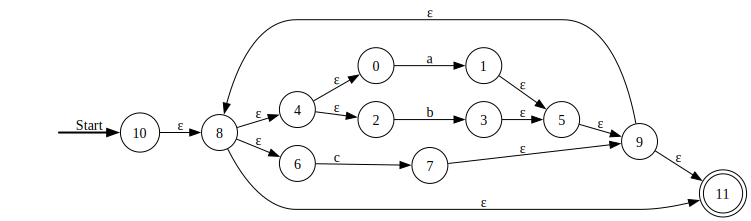

In [232]:

# Create and display the graph
nfa_graph = draw_nfa(states)
# nfa_graph.view()
nfa_graph

In [ ]:
""" 
edge => (transition, from, to)
state => (label, edges [ingoing or outgoing or both])
nfa => (starting state, accepting, inner)
"""

' \nedge => (transition, from, to)\nstate => (label, edges [ingoing or outgoing or both])\nnfa => (starting state, accepting, inner)\n'

In [227]:


def draw_nfa(nfa):
    dot = Digraph(
        format='png', graph_attr={'rankdir': 'LR'}, node_attr={'shape': 'circle'}
    )

    # Create an invisible start node
    dot.node("start", "", shape='none')
    starting_state = str(nfa["startingState"])
    dot.edge("start", starting_state, label="Start", style="bold")

    # Add nodes and edges for each state and its transitions
    for state, transitions in nfa.items():
        if state == "startingState":
            continue

        shape = 'doublecircle' if transitions.get(
            "isTerminatingState") else 'circle'
        state_str = str(state)  # Explicitly convert state to string
        dot.node(state_str, state_str, shape=shape)

        for label, ends in transitions.items():
            if label == "isTerminatingState":
                continue

            for end in ends:
                end_str = str(end)  # Explicitly convert end state to string
                dot.edge(state_str, end_str, label=label if label !=
                         "eps" else "ε", style="solid")

    # Render and display the graph
    dot.render('nfa_graph', format='png', cleanup=True)

    return dot